#### Añadimos el directorio raíz al sys.path para facilitar importaciones

In [1]:
import os

notebook_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
os.chdir(root_dir)

print("Directorio de trabajo actual después del cambio:", os.getcwd())

Directorio de trabajo actual después del cambio: /home/user/workshop2/workshop2


#### Importamos las librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Leemos el dataset de Spotify, y lo almacenamos en un Dataframe

In [3]:
Spotify = pd.read_csv('csv/spotify_dataset.csv', delimiter=',')

#### Informacion sobre el Dataset 

In [4]:
Spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Se puede ver que en el dataset tiene 114.000 filas y 21 columnas, de las cuales 6 son de tipo int (numericas), 9 son float (representa numeros con decimales), y 5 son Object (Contiene texto), y una de tipo bool (representa numeros con notacion booleana). 

Tambien se ve que el peso del dataframe es de: 17.5 MB

**Descripción de las columnas**

- **track_id**: El ID de Spotify para la pista.
- **artists**: Los nombres de los artistas que interpretaron la pista. Si hay más de un artista, están separados por un ";"
- **album_name**: El nombre del álbum en el que aparece la pista.
- **track_name**: Nombre de la pista.
- **popularity**: La popularidad de una pista es un valor entre 0 y 100, donde 100 es el más popular. La popularidad se calcula mediante un algoritmo y se basa principalmente en el número total de reproducciones que ha tenido la pista y cuán recientes son esas reproducciones. En general, las canciones que se reproducen mucho en este momento tendrán una popularidad mayor que las canciones que se reproducieron mucho en el pasado. Las pistas duplicadas (por ejemplo, la misma pista de un sencillo y un álbum) se califican de manera independiente. La popularidad de los artistas y álbumes se deriva matemáticamente de la popularidad de las pistas.
- **duration_ms**: La duración de la pista en milisegundos.
- **explicit**: Indica si la pista tiene letras explícitas (true = sí las tiene; false = no las tiene o se desconoce).
- **danceability**: La capacidad de baile describe qué tan adecuada es una pista para bailar, basada en una combinación de elementos musicales, incluidos el tempo, la estabilidad del ritmo, la fuerza del ritmo y la regularidad general. Un valor de 0.0 es el menos bailable y 1.0 es el más bailable.
- **energy**: La energía es una medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad. Generalmente, las pistas enérgicas se sienten rápidas, fuertes y ruidosas. Por ejemplo, el death metal tiene alta energía, mientras que un preludio de Bach puntúa bajo en la escala.
- **key**: La tonalidad en la que está la pista. Los enteros se asignan a notas mediante la notación de clase de tono estándar. Por ejemplo, 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detectó ninguna tonalidad, el valor es -1.
- **loudness**: La sonoridad general de una pista en decibelios (dB).
- **mode**: El modo indica la modalidad (mayor o menor) de una pista, el tipo de escala de la cual se deriva su contenido melódico. El modo mayor está representado por 1 y el modo menor por 0.
- **speechiness**: La medida de "speechiness" detecta la presencia de palabras habladas en una pista. Cuanto más se parezca a un discurso (por ejemplo, programas de entrevistas, audiolibros, poesía), más cerca estará del valor 1.0. Los valores por encima de 0.66 describen pistas que probablemente están compuestas completamente de palabras habladas. Los valores entre 0.33 y 0.66 describen pistas que pueden contener tanto música como habla, ya sea en secciones o superpuestas, como ocurre en la música rap. Los valores por debajo de 0.33 probablemente representan música y otras pistas no basadas en el habla.
- **acousticness**: Una medida de confianza de 0.0 a 1.0 de si la pista es acústica. Un valor de 1.0 representa una alta confianza en que la pista es acústica.
- **instrumentalness**: Predice si una pista no contiene voces. Los sonidos como "Ooh" y "Aah" se tratan como instrumentales en este contexto. Las pistas de rap o de palabra hablada se consideran claramente "vocales". Cuanto más cercano esté el valor de instrumentalness a 1.0, mayor es la probabilidad de que la pista no contenga contenido vocal.
- **liveness**: Detecta la presencia de una audiencia en la grabación. Los valores altos de "liveness" representan una mayor probabilidad de que la pista se haya grabado en vivo. Un valor superior a 0.8 indica una alta probabilidad de que la pista sea en vivo.
- **valence**: Una medida de 0.0 a 1.0 que describe la positividad musical que transmite una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, tristes, deprimidas, enojadas).
- **tempo**: El tempo estimado general de una pista en pulsos por minuto (BPM). En terminología musical, el tempo es la velocidad o el ritmo de una pieza dada y se deriva directamente de la duración promedio de los pulsos.
- **time_signature**: Una firma de tiempo estimada. La firma de tiempo (compás) es una convención notacional para especificar cuántos pulsos hay en cada compás (o medida). La firma de tiempo varía de 3 a 7, lo que indica firmas de tiempo de 3/4 a 7/4.
- **track_genre**: El género al que pertenece la pista.

#### Revisamos la presencia de valores nulos

In [5]:
valores_nulos = Spotify.isnull().sum()
print(valores_nulos)

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


Se puede ver que se registraron un total de 3 valores nulos en las columnas de artist, album_name, y track_name. por lo que se los va a remplazar por un mensage que diga 'dato no registrado', y luego comprovamos para ver los resultados 

In [6]:
Spotify.fillna({'artist':'Dato no Registrado','track_name': 'Dato no Registrado', 'album_name': 'Dato no Registrado'}, inplace=True)

In [7]:
valores_nulos = Spotify.isnull().sum()
print(valores_nulos)

Unnamed: 0          0
track_id            0
artists             1
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


Se puede ver que ya no hay datos nulos 

#### Revisamos la presencia de valores duplicados

In [8]:
valores_duplicados = Spotify.duplicated().sum()
print(valores_duplicados)

0


No se encontraron valores duplicados en el dataset

#### Revisamos la presencia de datos atipicos

Revisamos las variables numericas 'popularity', 'energy', 'acousticness', y 'valence'

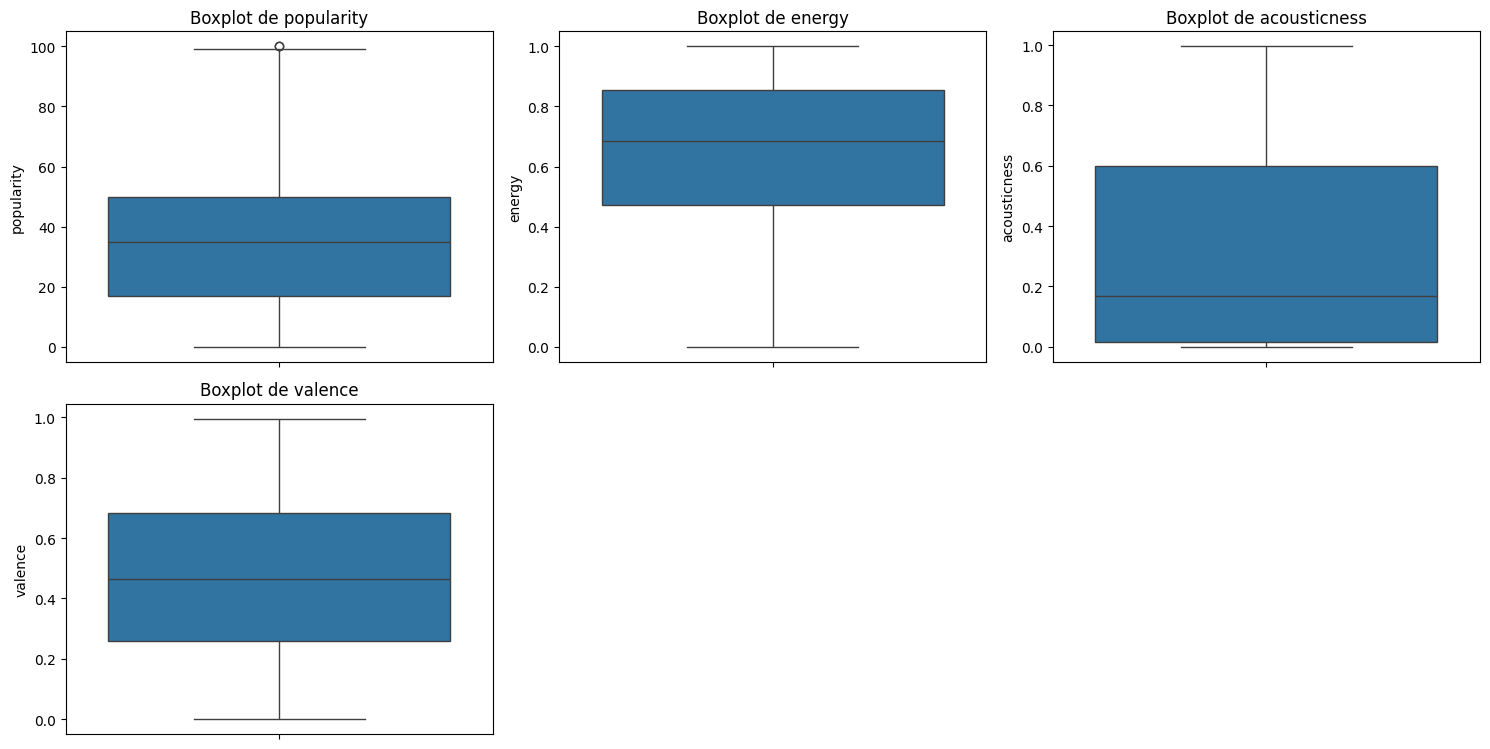

In [9]:
numerical_columns = ['popularity', 'energy', 'acousticness', 'valence']

plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)  
    sns.boxplot(y=Spotify[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()


Se puede ver que no hay datos atipicos presentes 

Se revisan las filas 'duration_ms' y 'tempo'

In [10]:
info = Spotify[['duration_ms', 'tempo']]

print(info)

        duration_ms    tempo
0            230666   87.917
1            149610   77.489
2            210826   76.332
3            201933  181.740
4            198853  119.949
...             ...      ...
113995       384999  125.995
113996       385000   85.239
113997       271466  132.378
113998       283893  135.960
113999       241826   79.198

[114000 rows x 2 columns]


Para estas columnas se realizaran una serie de converciones para poder facilitar el analisis del dataset. 

Se convertira la columna de 'duration_ms'de milisegundos a minutos, y la columna de 'tempo' se la va a dividir en categorias para clasificar las canciones en rangos de velocidad: 

- Lento: menos de 60 BPM
- Moderado: entre 60 y 120 BPM
- Rápido: más de 120 BPM

In [11]:
Spotify['duration_ms'] = Spotify['duration_ms'] / 60000

Spotify['tempo'] = pd.cut(Spotify['tempo'], bins=[0, 60, 120, float('inf')], labels=['Lento', 'Moderado', 'Rápido'])

Creamos Inforgramas para comprovar el contenido 

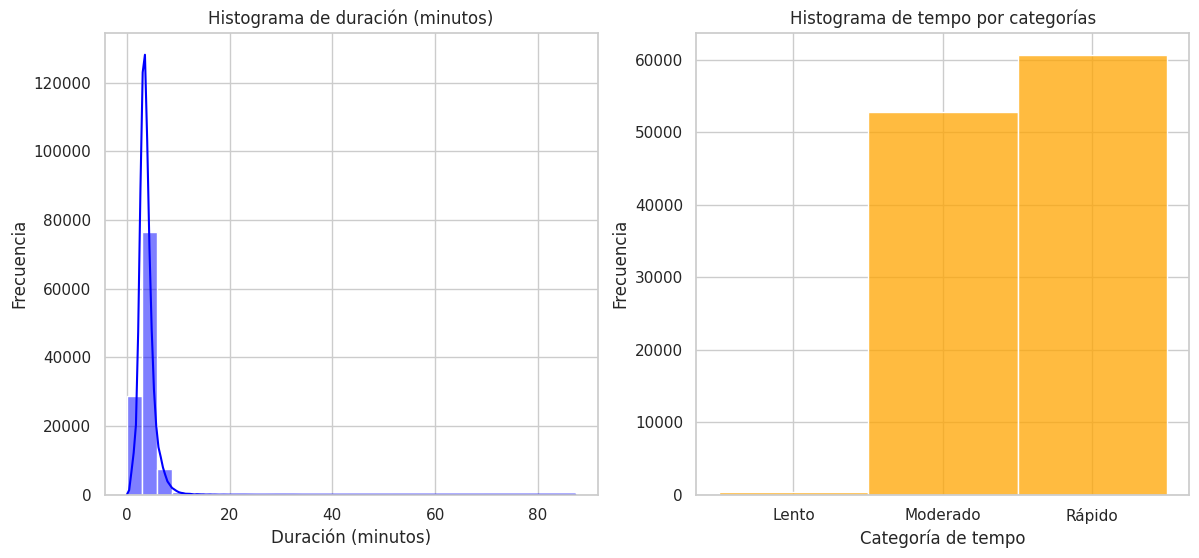

In [12]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(Spotify['duration_ms'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Histograma de duración (minutos)')
axes[0].set_xlabel('Duración (minutos)')
axes[0].set_ylabel('Frecuencia')

sns.histplot(Spotify['tempo'], discrete=True, color='orange')
plt.title('Histograma de tempo por categorías')
plt.xlabel('Categoría de tempo')
plt.ylabel('Frecuencia')

plt.show()


Vemos que las converciones se realizaron de manera correcta y no hay datos atipicos presentes 

Revisamos las filas de 'danceability', 'speechiness', 'instrumentalness', y 'liveness'

In [13]:
contenido_columnas = Spotify[['danceability', 'speechiness', 'instrumentalness', 'liveness']]
print(contenido_columnas)

        danceability  speechiness  instrumentalness  liveness
0              0.676       0.1430          0.000001    0.3580
1              0.420       0.0763          0.000006    0.1010
2              0.438       0.0557          0.000000    0.1170
3              0.266       0.0363          0.000071    0.1320
4              0.618       0.0526          0.000000    0.0829
...              ...          ...               ...       ...
113995         0.172       0.0422          0.928000    0.0863
113996         0.174       0.0401          0.976000    0.1050
113997         0.629       0.0420          0.000000    0.0839
113998         0.587       0.0297          0.000000    0.2700
113999         0.526       0.0725          0.000000    0.0893

[114000 rows x 4 columns]


Para un mejor entendimiento y analisis se va a realizar converciones a variables categoricas definiendo los rangos en vase a la informacion de las columnas que proporciona la fuente del dataset.

1. Categorías para danceability:
- Muy baja (0.0 - 0.2): Muy difícil para bailar.
- Baja (0.2 - 0.4): Algo difícil para bailar.
- Moderada (0.4 - 0.6): Moderadamente bailable.
- Alta (0.6 - 0.8): Adecuada para bailar.
- Muy alta (0.8 - 1.0): Muy bailable.

2. Categorías para speechiness:
- Baja (0.0 - 0.33): Predominantemente musical.
- Moderada (0.33 - 0.66): Mezcla de música y palabra hablada (rap).
- Alta (0.66 - 1.0): Principalmente palabra hablada (audiolibros, programas de entrevistas).

3. Categorías para instrumentalness:
- Baja (0.0 - 0.2): Con mucha presencia vocal.
- Moderada (0.2 - 0.5): Mayor presencia instrumental pero aún con algo de vocalización.
- Alta (0.5 - 0.8): Principalmente instrumental.
- Muy alta (0.8 - 1.0): Prácticamente sin contenido vocal.

4. Categorías para liveness:
- Baja (0.0 - 0.3): Estudio (poca o ninguna presencia en vivo).
- Moderada (0.3 - 0.6): Algún indicio de ambiente en vivo.
- Alta (0.6 - 0.8): Probabilidad de grabación en vivo.
- Muy alta (0.8 - 1.0): Grabación en vivo (audiencia presente).

In [14]:
danceability_bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
danceability_labels = ['Muy baja', 'Baja', 'Moderada', 'Alta', 'Muy alta']
Spotify['danceability'] = pd.cut(Spotify['danceability'], bins=danceability_bins, labels=danceability_labels)

speechiness_bins = [0.0, 0.33, 0.66, 1.0]
speechiness_labels = ['Baja', 'Moderada', 'Alta']
Spotify['speechiness'] = pd.cut(Spotify['speechiness'], bins=speechiness_bins, labels=speechiness_labels)

instrumentalness_bins = [0.0, 0.2, 0.5, 0.8, 1.0]
instrumentalness_labels = ['Baja', 'Moderada', 'Alta', 'Muy alta']
Spotify['instrumentalness'] = pd.cut(Spotify['instrumentalness'], bins=instrumentalness_bins, labels=instrumentalness_labels)

liveness_bins = [0.0, 0.3, 0.6, 0.8, 1.0]
liveness_labels = ['Baja', 'Moderada', 'Alta', 'Muy alta']
Spotify['liveness'] = pd.cut(Spotify['liveness'], bins=liveness_bins, labels=liveness_labels)

Creamos Graficos de barras para ver los posibles datos atipicos en las filas 

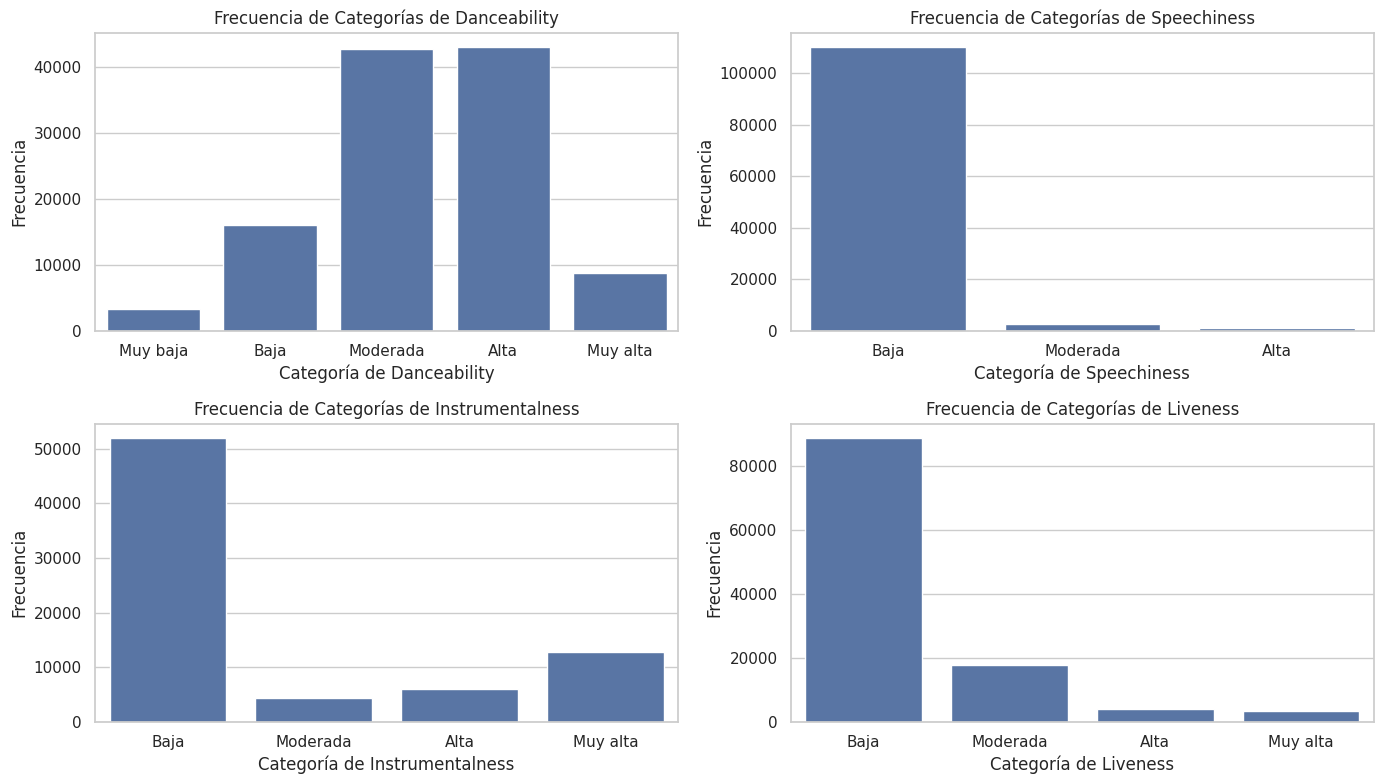

In [15]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='danceability', data=Spotify)
plt.title('Frecuencia de Categorías de Danceability')
plt.xlabel('Categoría de Danceability')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 2)
sns.countplot(x='speechiness', data=Spotify)
plt.title('Frecuencia de Categorías de Speechiness')
plt.xlabel('Categoría de Speechiness')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 3)
sns.countplot(x='instrumentalness', data=Spotify)
plt.title('Frecuencia de Categorías de Instrumentalness')
plt.xlabel('Categoría de Instrumentalness')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 4)
sns.countplot(x='liveness', data=Spotify)
plt.title('Frecuencia de Categorías de Liveness')
plt.xlabel('Categoría de Liveness')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Vemos que no hay datos atipicos en estas columnas 

Se realizan histogramas para ver la presencia de datos atipicos en las columnas de 'time_signature', y 'Loudness'

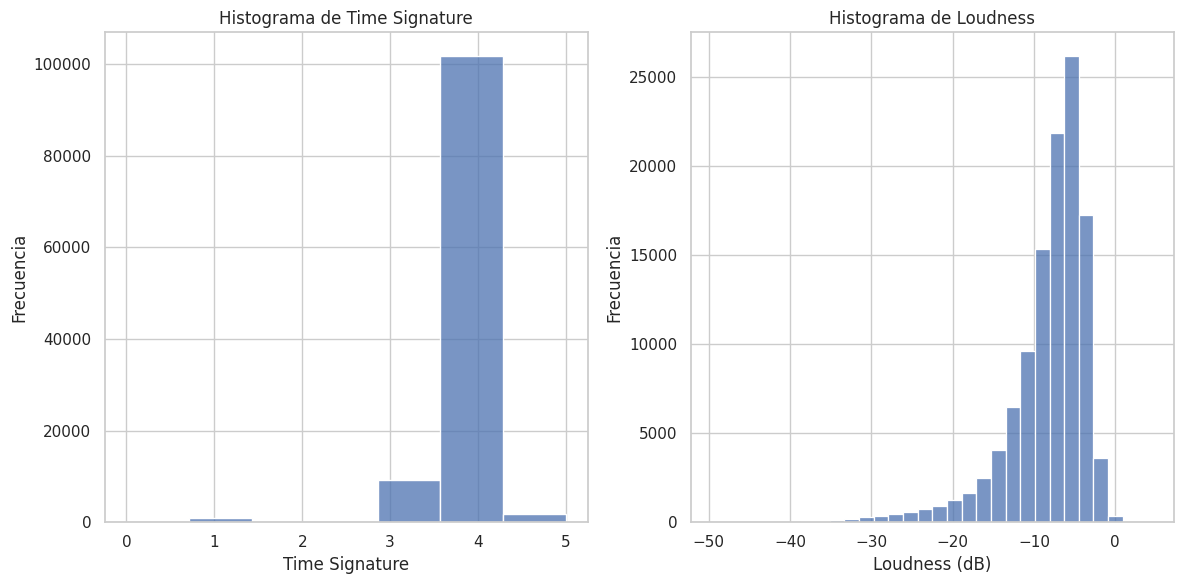

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(Spotify['time_signature'], bins=7, kde=False)
plt.title('Histograma de Time Signature')
plt.xlabel('Time Signature')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(Spotify['loudness'], bins=30, kde=False)
plt.title('Histograma de Loudness')
plt.xlabel('Loudness (dB)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Se puede ver que no hay datos fuera de lo comun 

Se categorizan las filas de 'explicit' y 'mode' 
- True = Explícito.
- False = No explícito.

- 0 = Modo menor.
- 1 = Modo mayor.

In [17]:
Spotify['explicit'] = Spotify['explicit'].apply(lambda x: 'Explícito' if x else 'No explícito')
Spotify['mode'] = Spotify['mode'].apply(lambda x: 'Mayor' if x == 1 else 'Menor')

#### Se van a generar graficas de las diversas columnas del dataset para sacar informacion relevante del dataset y entender la relacion entre sus filas 

#### track_name 

Miramos la cantidad total de tracks en el dataset 

In [27]:
total_tracks = len(Spotify)
print(f"Total de tracks en el dataset: {total_tracks}")

Total de tracks en el dataset: 114000


Miramos la cantidad de albunes totales en el dataset 

In [35]:
total_albums = Spotify['album_name'].nunique()
print(f"Total de álbumes únicos en el dataset: {total_albums}")

Total de álbumes únicos en el dataset: 46590


Se realiza un grafico de barras con el objetivo de ver los 10 tracks con mayor popularidad para esto tomamos las filas de 'track_name' y 'popularity'

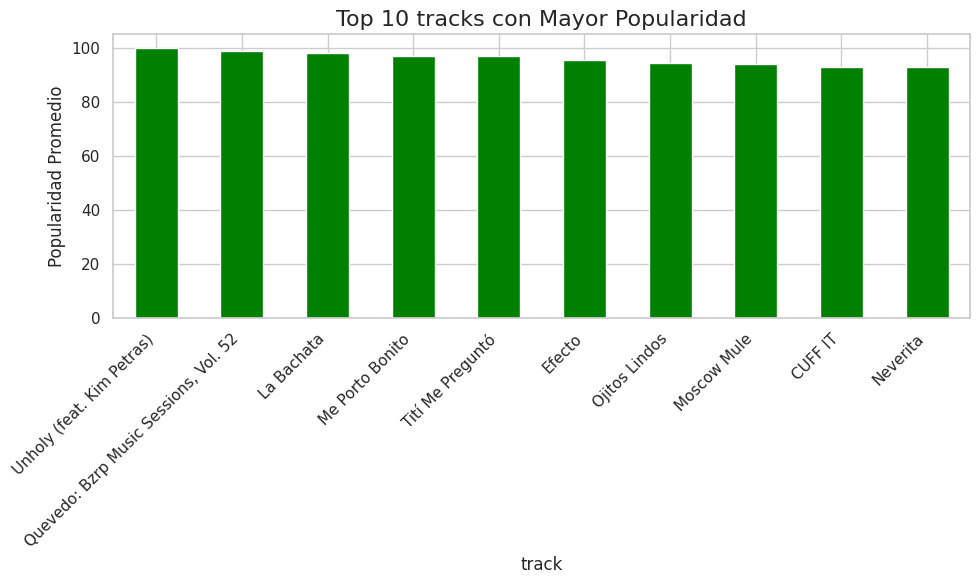

In [18]:
tracks_popularidad = Spotify[['track_name', 'popularity']].drop_duplicates().groupby('track_name')['popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
tracks_popularidad.plot(kind='bar', color='green')

plt.title('Top 10 tracks con Mayor Popularidad', fontsize=16)
plt.xlabel('track', fontsize=12)
plt.ylabel('Popularidad Promedio', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Se puede ver que el track con una popularidad mayor a las demas con una diferencia vastante pequeña en cuanto a las demas tracks es la cancion Unholy con un puntaje de popularidad de casi 100 puntos

Se crea un grafico de barras para ver el tiempo de duracion de estas 10 canciones mas populares 

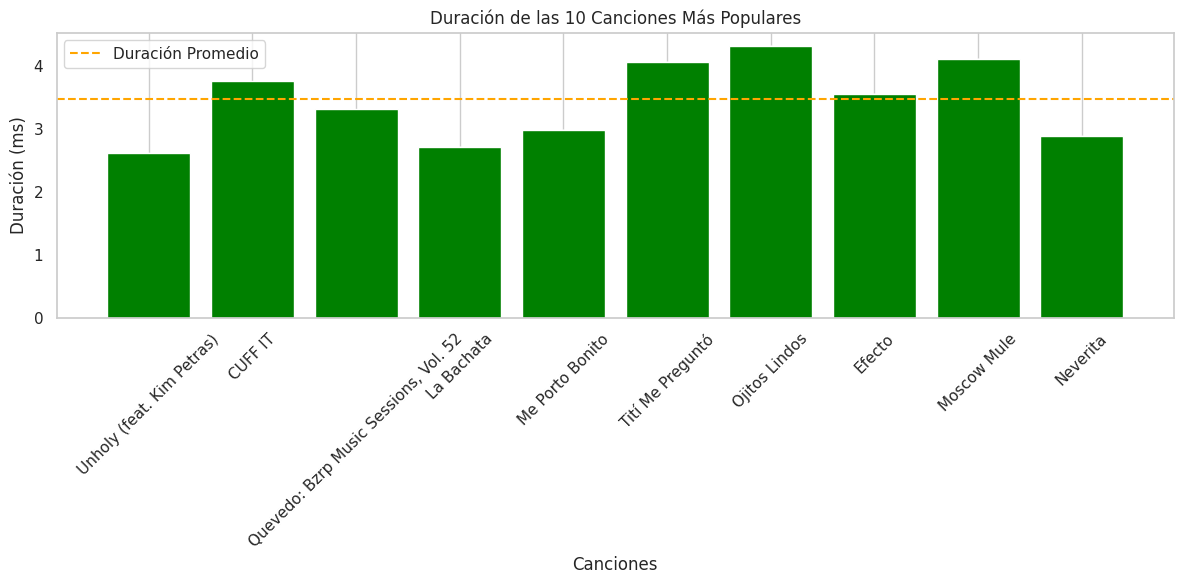

In [19]:
canciones_populares = Spotify.groupby('track_name')['popularity'].mean().sort_values(ascending=False)
top_10 = canciones_populares.head(10)
top_10_duracion = Spotify[Spotify['track_name'].isin(top_10.index)][['track_name', 'duration_ms']]
resultados_duracion = top_10_duracion['duration_ms'].mean()

plt.figure(figsize=(12, 6))
plt.bar(top_10_duracion['track_name'], top_10_duracion['duration_ms'], color='green')
plt.axhline(y=resultados_duracion, color='orange', linestyle='--', label='Duración Promedio')
plt.title('Duración de las 10 Canciones Más Populares')
plt.xlabel('Canciones')
plt.ylabel('Duración (ms)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Se puede ver que la duracion promedio de estas canciones esta entre los 3 y 4 minutos de duracion, lo que puede indicar una preferencia del usuario asia este tipo de tiempos, para tener una mejor idea de este resultado vamos a crear un grafico de barras para ver las 10 canciones menos populares y posteriormente hacer el mismo proceso para ver si hay una prefererncia. 

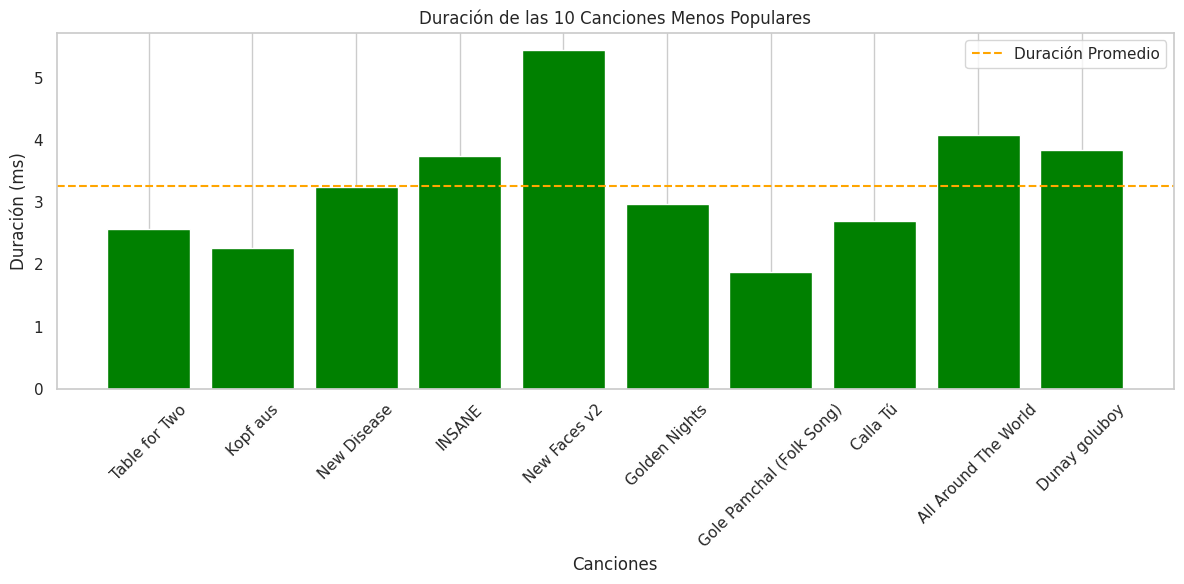

In [20]:
menos_populares = Spotify.groupby('track_name')['popularity'].mean().sort_values(ascending=True)
menos_10 = menos_populares.head(10)
menos_10_populares = Spotify[Spotify['track_name'].isin(menos_10.index)][['track_name', 'duration_ms']]
duracion = menos_10_populares['duration_ms'].mean()

plt.figure(figsize=(12, 6))
plt.bar(menos_10_populares['track_name'], menos_10_populares['duration_ms'], color='green')
plt.axhline(y=duracion, color='orange', linestyle='--', label='Duración Promedio')
plt.title('Duración de las 10 Canciones Menos Populares')
plt.xlabel('Canciones')
plt.ylabel('Duración (ms)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Miramos que no hay una mayor diferencia en cuanto las 10 mas populares, lo que indica que el factor de el tiempo no suele influir en la popularidad de estas 

Miramos si las 10 canciones mas populares contienen letras explicitas 

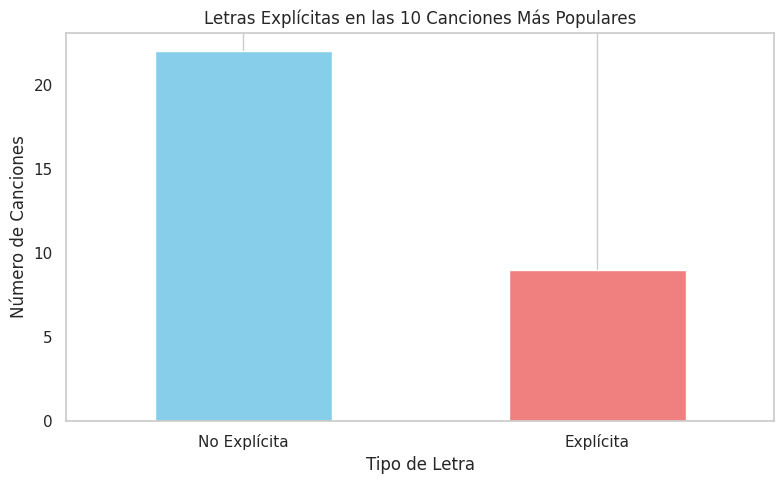

In [21]:
top_10_explicidad = Spotify[Spotify['track_name'].isin(top_10.index)][['track_name', 'explicit']]
contenido_explicito = top_10_explicidad['explicit'].value_counts()

plt.figure(figsize=(8, 5))
contenido_explicito.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Letras Explícitas en las 10 Canciones Más Populares')
plt.xlabel('Tipo de Letra')
plt.ylabel('Número de Canciones')
plt.xticks(ticks=[0, 1], labels=['No Explícita', 'Explícita'], rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Vemos que la mayoria no las contiene hacemos lo mismo con las menos populares para ver si existe una preferencia

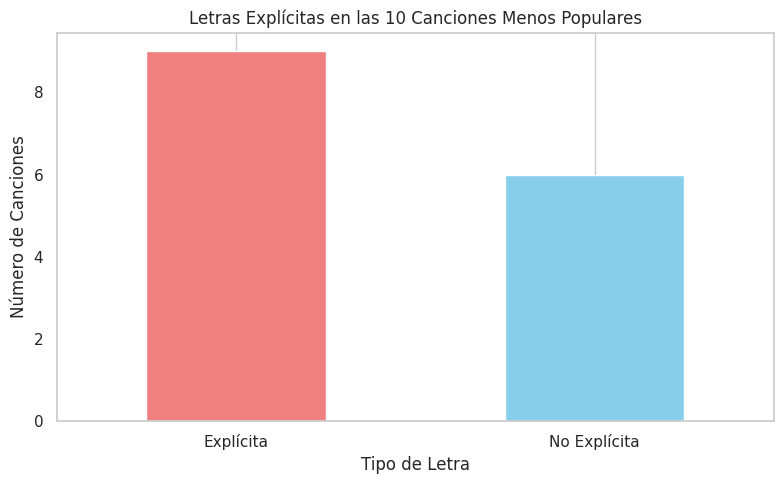

In [22]:
menos_10 = menos_populares.head(10)
menos_populares = Spotify[Spotify['track_name'].isin(menos_10.index)][['track_name', 'explicit']]
contenido_explicito = menos_populares['explicit'].value_counts()

plt.figure(figsize=(8, 5))
contenido_explicito.plot(kind='bar', color=['lightcoral', 'skyblue'])
plt.title('Letras Explícitas en las 10 Canciones Menos Populares')
plt.xlabel('Tipo de Letra')
plt.ylabel('Número de Canciones')
plt.xticks(ticks=[0, 1], labels=['Explícita', 'No Explícita'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Aqui se puede ver como las canciones menos populares tienen en su mayoria canciones mas explicitas lo que puede indicar una preferencia del usuario por reproducir canciones con poco o nulo contenido explicito 

Creamos un grafico comparativo para ver la positivad musical entre las canciones mas populares y las menos

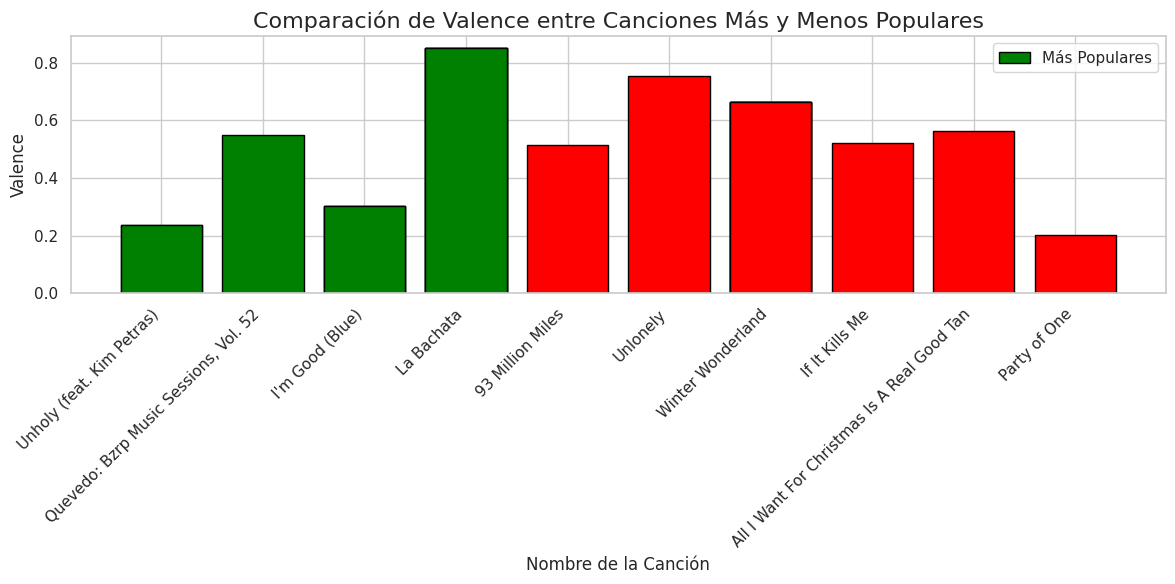

In [49]:
Spotify['valence'] = pd.to_numeric(Spotify['valence'], errors='coerce')
most_popular = Spotify.nlargest(10, 'popularity')[['track_name',  'popularity', 'valence']]
least_popular = Spotify.nsmallest(10, 'popularity')[['track_name',  'popularity', 'valence']]
most_popular['type'] = 'Más Populares'
least_popular['type'] = 'Menos Populares'
comparison_df = pd.concat([most_popular, least_popular])

plt.figure(figsize=(12, 6))
bars = plt.bar(comparison_df['track_name'], comparison_df['valence'], color=comparison_df['type'].map({'Más Populares': 'green', 'Menos Populares': 'red'}), edgecolor='black')

plt.title('Comparación de Valence entre Canciones Más y Menos Populares', fontsize=16)
plt.xlabel('Nombre de la Canción', fontsize=12)
plt.ylabel('Valence', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.legend(['Más Populares', 'Menos Populares'], loc='upper right')

plt.tight_layout()
plt.show()

las canciones más populares tienden a estar distribuidas de manera más variada en cuanto a la valencia, mientras que algunas de las menos populares son más alegres, aunque no han alcanzado la misma popularidad. Esto podría indicar que la popularidad de una canción no siempre está directamente relacionada con cuán alegre o positiva es su tonalidad.

Creamos cuadro comparativo que use la columna acousticness, para ver si hay un contraste entre las canciones mas o menos populares en cuanto a si las canciones son acusticas o no 

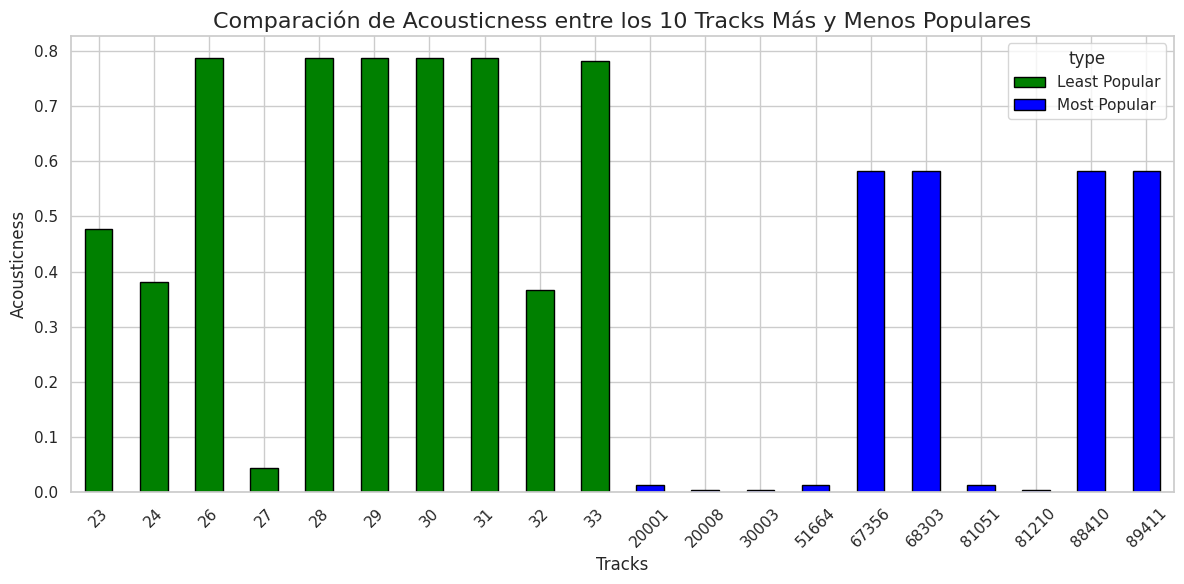

In [58]:
most_popular_tracks = Spotify.nlargest(10, 'popularity')[['track_name', 'acousticness']]
least_popular_tracks = Spotify.nsmallest(10, 'popularity')[['track_name', 'acousticness']]

most_popular_tracks['type'] = 'Most Popular'
least_popular_tracks['type'] = 'Least Popular'

comparison_acousticness_df = pd.concat([most_popular_tracks, least_popular_tracks])

comparison_acousticness_df_numeric = comparison_acousticness_df.drop(columns=['track_name'])

comparison_acousticness_df_numeric.pivot(columns='type', values='acousticness').plot(
    kind='bar', stacked=True, figsize=(12, 6), color=['green', 'blue'], edgecolor='black'
)

plt.title('Comparación de Acousticness entre los 10 Tracks Más y Menos Populares', fontsize=16)
plt.xlabel('Tracks', fontsize=12)
plt.ylabel('Acousticness', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Las canciones menos populares tienen una mayor presencia de instrumentos acústicos. En cambio, las canciones más populares muestran muy poca acousticness, lo que sugiere que el público prefiere canciones con menos contenido acústico, posiblemente inclinándose hacia sonidos más electrónicos o producidos en un entorno digital.

#### track_genre

Miramos la cantidad total de generos en el dataset 

In [34]:
total_generos = Spotify['track_genre'].nunique()
print(f"Total de géneros únicos en el dataset: {total_generos}")

Total de géneros únicos en el dataset: 114


Creamos un grafico de varras para ver los generos mas populares 

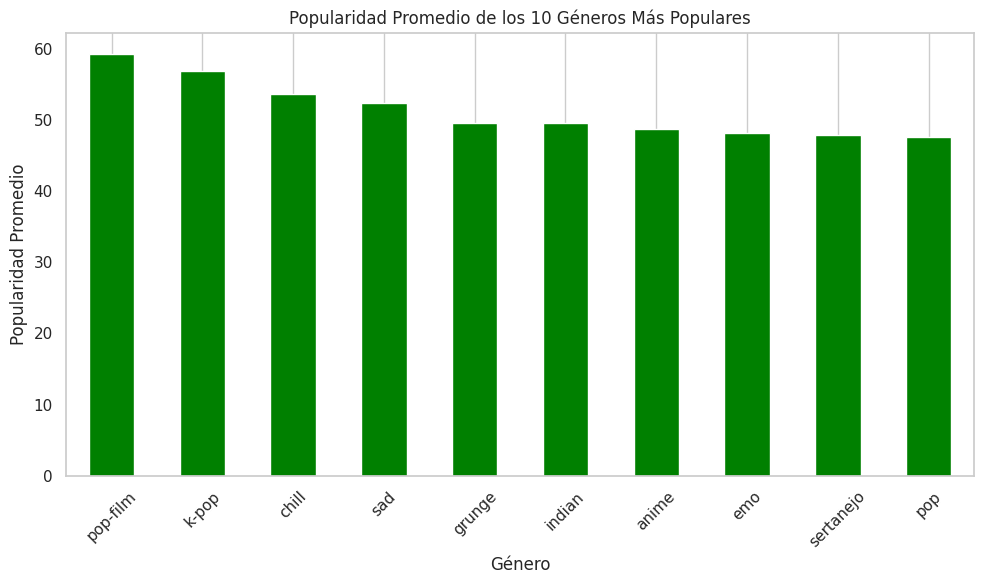

In [23]:
generos = Spotify.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
top_10_genres = generos.head(10)

plt.figure(figsize=(10, 6))
top_10_genres.plot(kind='bar', color='green')
plt.title('Popularidad Promedio de los 10 Géneros Más Populares')
plt.xlabel('Género')
plt.ylabel('Popularidad Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Se puede ver que el genero de pop-film es el mas popular seguido del de K-pop 

Sacamos que tan vailables son estos 10 generos mas populares 

/tmp/ipykernel_10441/1504795560.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bailabilidad = top_10_generos.groupby(['track_genre', 'danceability']).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

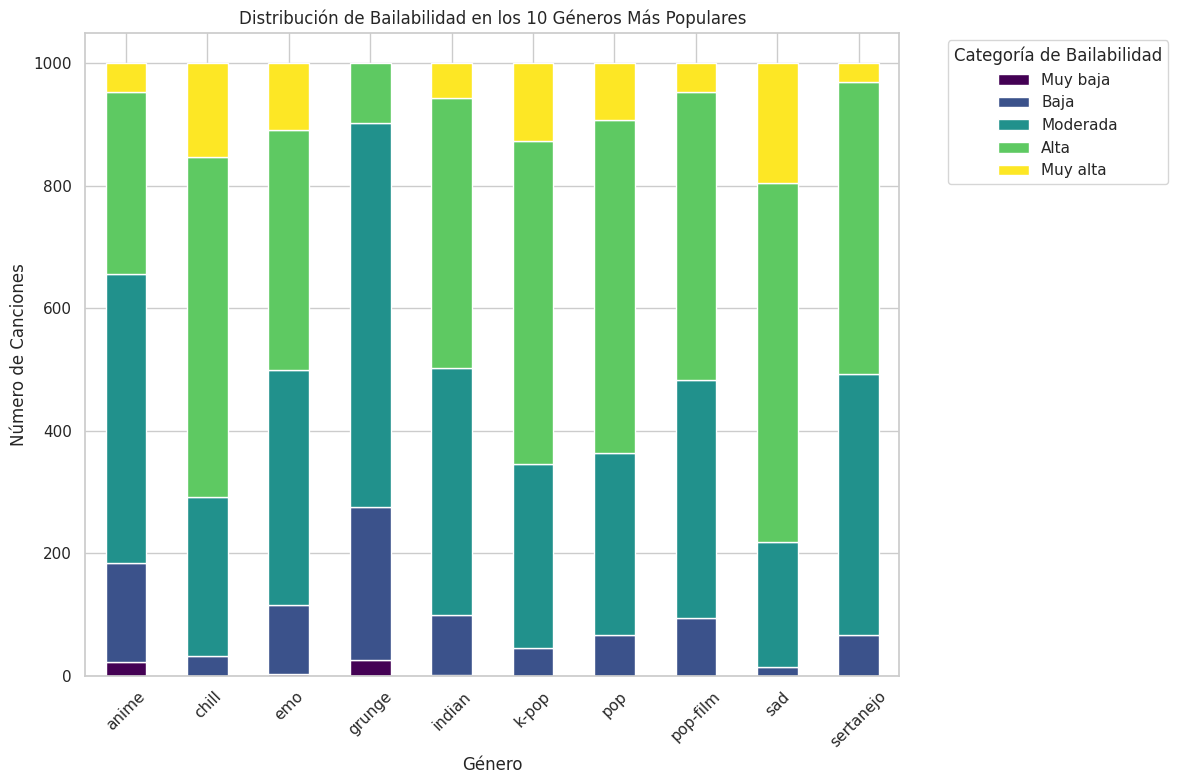

In [24]:
genero = Spotify.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
top_generos = genero.head(10).index
top_10_generos = Spotify[Spotify['track_genre'].isin(top_generos)]
bailabilidad = top_10_generos.groupby(['track_genre', 'danceability']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
bailabilidad.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))

plt.title('Distribución de Bailabilidad en los 10 Géneros Más Populares')
plt.xlabel('Género')
plt.ylabel('Número de Canciones')
plt.xticks(rotation=45)
plt.legend(title='Categoría de Bailabilidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Se puede ver que:

- Géneros como "pop", "k-pop" y "pop-film" son los más bailables, con una alta proporción de canciones que se encuentran en las categorías de alta y muy alta bailabilidad.
- Géneros como "emo", "grunge", y "sad" son menos bailables, con mayor proporción de canciones en las categorías baja y moderada.

hay muy pocas canciones en cualquier género con muy baja bailabilidad, lo que significa que la mayoría de las canciones tiene algún nivel de capacidad para bailar.

Creamos un cuadro comparativo con el promedio de la energia de los generos mas populares en comparacion con los menos 

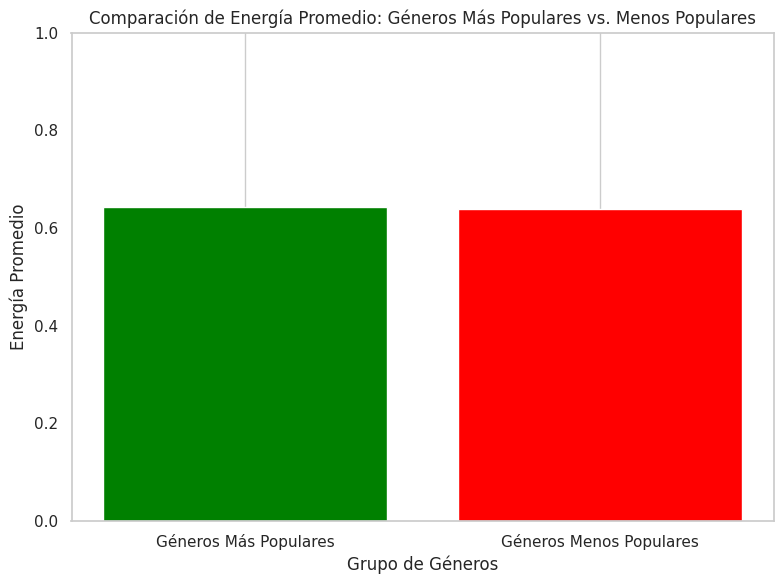

In [25]:
pop_genre_avg = Spotify.groupby('track_genre')['popularity'].mean()
popularity_median = pop_genre_avg.median()
popular_genres = pop_genre_avg[pop_genre_avg > popularity_median].index  
less_popular_genres = pop_genre_avg[pop_genre_avg <= popularity_median].index  
popular_genres_df = Spotify[Spotify['track_genre'].isin(popular_genres)]
less_popular_genres_df = Spotify[Spotify['track_genre'].isin(less_popular_genres)]
energy_popular_avg = popular_genres_df['energy'].mean()
energy_less_popular_avg = less_popular_genres_df['energy'].mean()

energy_comparison_avg = pd.DataFrame({
    'Grupo': ['Géneros Más Populares', 'Géneros Menos Populares'],
    'Energía Promedio': [energy_popular_avg, energy_less_popular_avg]
})

plt.figure(figsize=(8, 6))
plt.bar(energy_comparison_avg['Grupo'], energy_comparison_avg['Energía Promedio'], color=['green', 'red'])
plt.title('Comparación de Energía Promedio: Géneros Más Populares vs. Menos Populares')
plt.xlabel('Grupo de Géneros')
plt.ylabel('Energía Promedio')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Se puede evidenciar que hay una energia similar en cuanto a los generos mas populares y los menos populares por lo que no suele aver un patron de preferencia en el usuario en cuanto a ese aspecto

Creamos un grafico de barras comparativo de la columna loudeness para ver los decivelios de los generos mas y menos populares. 

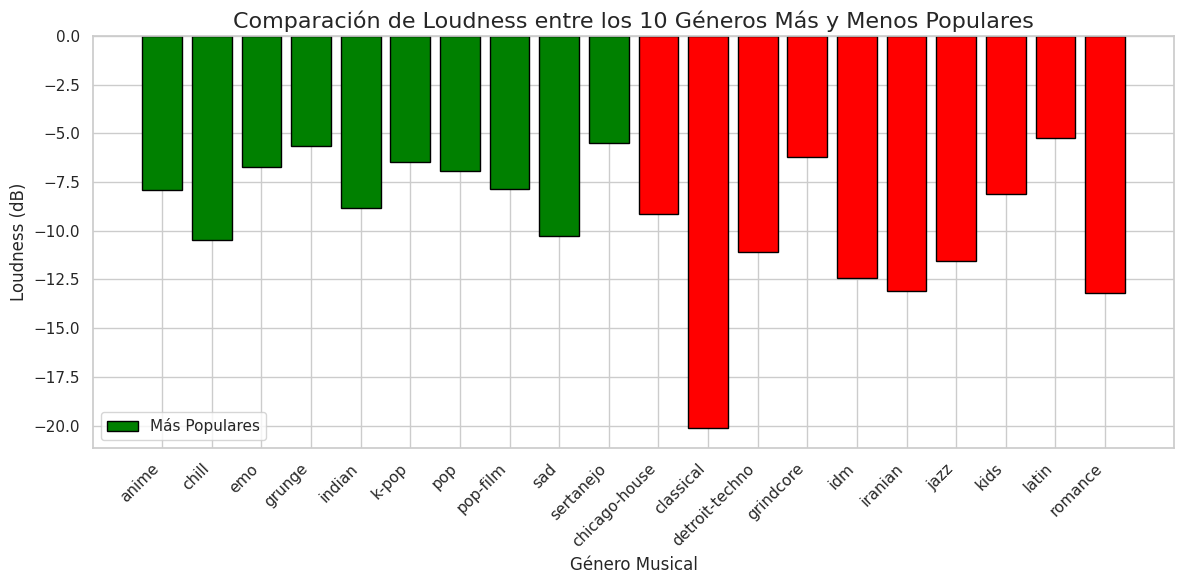

In [57]:
Spotify['loudness'] = pd.to_numeric(Spotify['loudness'], errors='coerce')
genre_popularity = Spotify.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

most_popular_genres = genre_popularity.head(10)
least_popular_genres = genre_popularity.tail(10)

most_popular_genres_df = Spotify[Spotify['track_genre'].isin(most_popular_genres.index)]
least_popular_genres_df = Spotify[Spotify['track_genre'].isin(least_popular_genres.index)]

most_popular_loudness = most_popular_genres_df.groupby('track_genre')['loudness'].mean()
least_popular_loudness = least_popular_genres_df.groupby('track_genre')['loudness'].mean()

most_popular_loudness_df = pd.DataFrame({'track_genre': most_popular_loudness.index, 'loudness': most_popular_loudness.values, 'type': 'Más Populares'})
least_popular_loudness_df = pd.DataFrame({'track_genre': least_popular_loudness.index, 'loudness': least_popular_loudness.values, 'type': 'Menos Populares'})
comparison_df = pd.concat([most_popular_loudness_df, least_popular_loudness_df])

plt.figure(figsize=(12, 6))
bars = plt.bar(comparison_df['track_genre'], comparison_df['loudness'], color=comparison_df['type'].map({'Más Populares': 'green', 'Menos Populares': 'red'}), edgecolor='black')

plt.title('Comparación de Loudness entre los 10 Géneros Más y Menos Populares', fontsize=16)
plt.xlabel('Género Musical', fontsize=12)
plt.ylabel('Loudness (dB)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.legend(['Más Populares', 'Menos Populares'], loc='lower left')

plt.tight_layout()
plt.show()

Los géneros musicales más populares tienden a tener un loudness más alto (más fuerte) en comparación con los géneros menos populares, que son en su mayoría más suaves o menos intensos. Esto podría indicar que las canciones con mayor intensidad sonora suelen ser más atractivas o adecuadas para el usuario, mientras que los géneros más tranquilos o con menor volumen tienden a ser menos populares.

#### artist 

Miramos la cantidad total de artistas en el dataset

In [33]:
total_artistas = Spotify['artists'].nunique()
print(f"Total de artistas únicos en el dataset: {total_artistas}")

Total de artistas únicos en el dataset: 31437


Creamos un grafico de barras para ver los artistas on una mayor popularidas

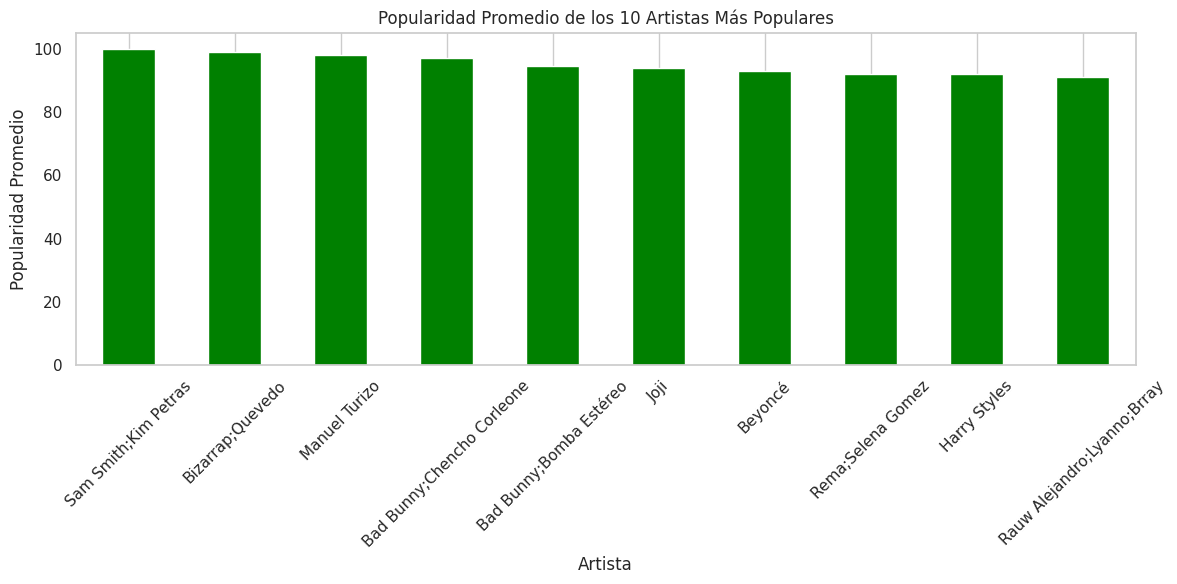

In [26]:
artist_populares = Spotify.groupby('artists')['popularity'].mean().sort_values(ascending=False)
top_10_artists = artist_populares.head(10)

plt.figure(figsize=(12, 6))
top_10_artists.plot(kind='bar', color='green')
plt.title('Popularidad Promedio de los 10 Artistas Más Populares')
plt.xlabel('Artista')
plt.ylabel('Popularidad Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


Tenemos que los artistas mas destacados son Sam Smith junto con Kim Petras, con una diferencia baja con respecto a Bizarrap y Quevedo. tambien vemos una concordancia con las canciones mas populares que se vio anteriormente con los autores de estas 

#### Conclusiones 